This notebook is used to find recording with consecutive 0 or -1

In [1]:
import pandas as pd
import csv
import obspy
import matplotlib.pyplot as plt
import numpy as np
from trace_quality_control import *
import os

In [8]:
#Load the catalogue
SEISAN_DATA = os.environ['SEISAN_DATA']
CSVpath = os.path.dirname(SEISAN_DATA)
os.chdir(CSVpath)
jan2005=pd.read_csv(os.path.join(CSVpath, 'MVOE_catalog200501.csv'))
feb2005=pd.read_csv(os.path.join(CSVpath, 'MVOE_catalog200502.csv'))
frames=[jan2005,feb2005]
cat=pd.concat(frames)
cat.reset_index()

,index,datetime,mainclass,subclass,duration,wavfilepath,sampling_rate,npts,traceNum,traceID,sfilepath
0,0,2005-01-01 01:00:15,R,_,71.0,./seismo/WAV/MVOE_/2005/01/2005-01-01-0100-19S...,100,7100,0,.MBBY.Z.BH,./seismo/REA/MVOE_/2005/01/01-0100-15R.S200501
1,1,2005-01-01 01:00:15,R,_,71.0,./seismo/WAV/MVOE_/2005/01/2005-01-01-0100-19S...,75,5325,1,.MBGB.Z.BH,./seismo/REA/MVOE_/2005/01/01-0100-15R.S200501
2,2,2005-01-01 01:00:15,R,_,71.0,./seismo/WAV/MVOE_/2005/01/2005-01-01-0100-19S...,75,5325,2,.MBGH.Z.BH,./seismo/REA/MVOE_/2005/01/01-0100-15R.S200501
3,3,2005-01-01 01:00:15,R,_,71.0,./seismo/WAV/MVOE_/2005/01/2005-01-01-0100-19S...,100,7100,3,.MBHA.Z.BH,./seismo/REA/MVOE_/2005/01/01-0100-15R.S200501
4,4,2005-01-01 01:00:15,R,_,71.0,./seismo/WAV/MVOE_/2005/01/2005-01-01-0100-19S...,100,7100,4,.MBLY.Z.BH,./seismo/REA/MVOE_/2005/01/01-0100-15R.S200501
...,...,...,...,...,...,...,...,...,...,...,...
3742,1775,2005-02-28 16:45:47,R,_,63.0,./seismo/WAV/MVOE_/2005/02/2005-02-28-1645-47S...,100,6300,15,.MBLY.N.BH,./seismo/REA/MVOE_/2005/02/28-1645-47R.S200502
3743,1776,2005-02-28 16:45:47,R,_,63.0,./seismo/WAV/MVOE_/2005/02/2005-02-28-1645-47S...,100,6300,16,.MBBY.N.BH,./seismo/REA/MVOE_/2005/02/28-1645-47R.S200502
3744,1777,2005-02-28 16:45:47,R,_,63.0,./seismo/WAV/MVOE_/2005/02/2005-02-28-1645-47S...,100,6300,17,.MBBY.E.BH,./seismo/REA/MVOE_/2005/02/28-1645-47R.S200502
3745,1778,2005-02-28 16:45:47,R,_,63.0,./seismo/WAV/MVOE_/2005/02/2005-02-28-1645-47S...,100,6300,18,.MBHA.N.BH,./seismo/REA/MVOE_/2005/02/28-1645-47R.S200502


There is consecutive 0 or -1. in this recording


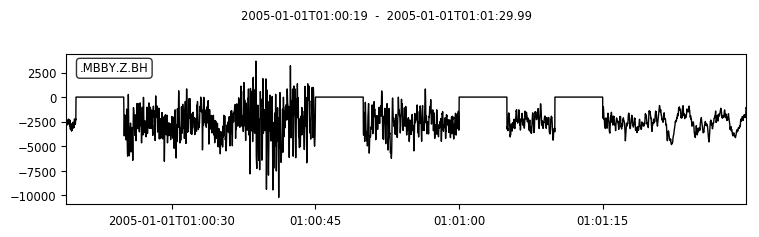

Good Recording


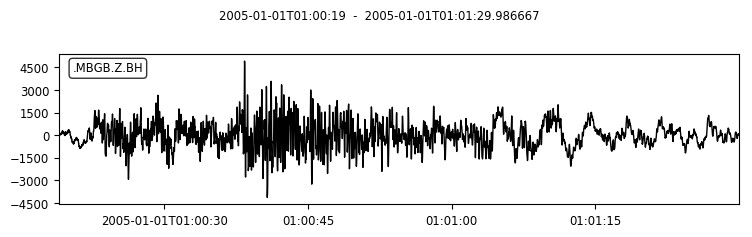

Good Recording


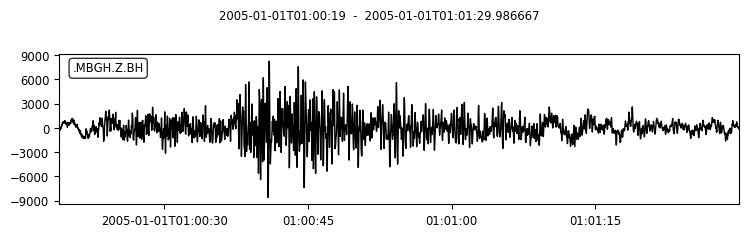

Good Recording


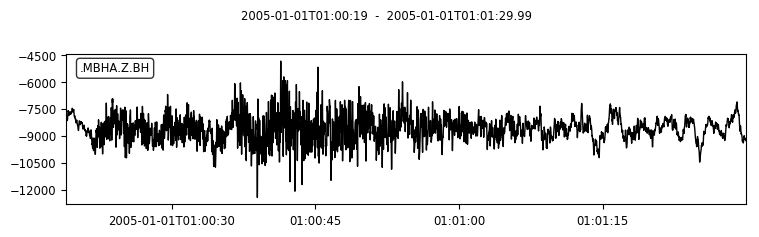

Good Recording


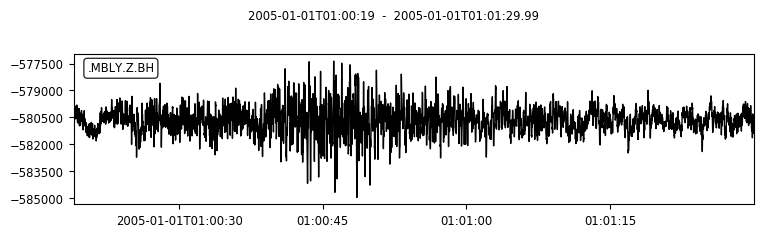

Good Recording


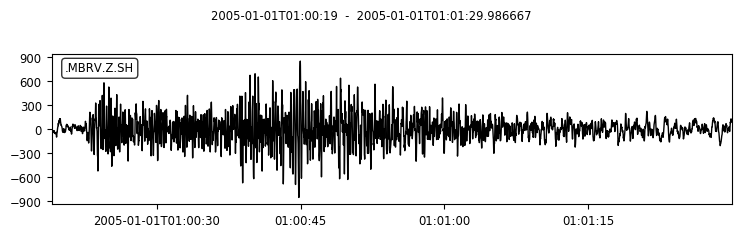

There is consecutive 0 or -1. in this recording


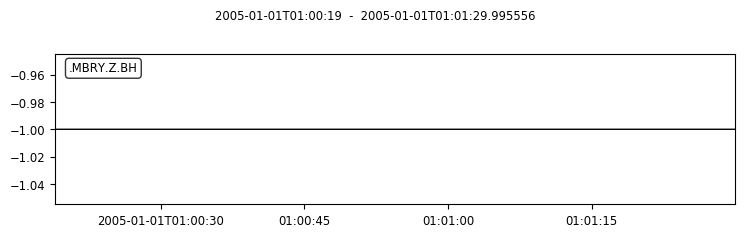

Good Recording


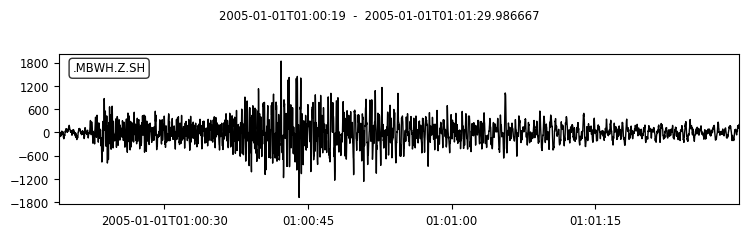

There is consecutive 0 or -1. in this recording


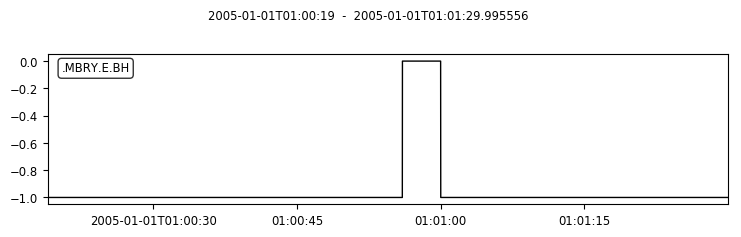

There is consecutive 0 or -1. in this recording


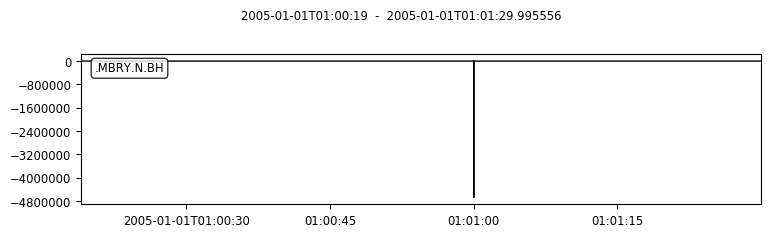

In [9]:
for i in range(10):
    station=cat.iloc[i][" traceID"].split(".")[1]
    location=cat.iloc[i][" traceID"].split(".")[2]
    obspy.read(cat.iloc[i][" wavfilepath"]).select(station=station,location=location)
    #name="/Volumes/Antennes/Processing/figure/testFigure"+str(i)+"png"
    #obspy.read(cat.iloc[i][" wavfilepath"]).select(station=station,location=location).plot(outfile=name)
    #print(station)
    data=obspy.read(cat.iloc[i][" wavfilepath"]).select(station=station,location=location)[0].data
    if check0andMinus1(data):
        print('Good Recording')
        obspy.read(cat.iloc[i][" wavfilepath"]).select(station=station,location=location).plot()
    else:
        print("There is consecutive 0 or -1. in this recording")
        obspy.read(cat.iloc[i][" wavfilepath"]).select(station=station,location=location).plot()



        